## ML Algorithms, Part 5, K-Means Clustering

K-Means Clustering may allude to K-Nearest Neighbors but two differ significantly. In KNN we knew what class each data point belong to and we just trained a classifier to tell them apart. In KMeans we don't know what these classes are. The most often used example is that of having data on customers (e.g. what they bought, how often, where they live, their age, etc) and trying to identify whether there are any subgroups and what tells these subgroups apart (e.g. those living in X part of the city tend to buy product Y more often). 

This method works by randomly (or with some heuristic) assigning each point to one of K different clusters and then, a centroid is calculated for each class; a point that has the mean value of each class. Equivalently, we can start by defining K random points that act as centroids, and then assign each point to the closest centroid. Then, we repeatedly iterate between these two steps of calculating centroid points of clusters and then reassigning points to the closest centroids until either there is no change or we meet some predefined stopping criterion. Let's look at the code:

#### Imports

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# strictly speaking, we don't need metrics, although there are ways to 
# quantify the goodness of models, we won't go into the specifs here
# we will use accuracy just because we know the real values
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris # we can work on Iris and pretend we don't know the classes 

In [2]:
# these should be familiar, and we will also skip the visualizations
iris = load_iris()

X = iris.data
Y = iris.target

df = pd.DataFrame(np.concatenate([X, Y.reshape((-1,1))], axis=1), columns=iris.feature_names+["Class"])

There is no need to split in training and testing, we will "train" on X and test with Y.

Here will pick 3 clusters because we know there are 3 different flower types. Normally we won't know how many clusters there are, so the choice of K may cause significant change in results.

In [3]:
Y[0], Y[51], Y[101]

(0, 1, 2)

In [4]:
kmc = KMeans(3)

In [5]:
# fitting and predicting in the same step
preds = kmc.fit_predict(X)

Calculating accuracy is tricky and doesn't really apply here. We could try checking which cluster from KMeans better identifies to the original dataset, and one quick but error-prone way would be to compare a few examples from each case based on index, and translate these values. Keep in mind that this will almost certainly not work as expected, but we do it for the fun of it.

In [6]:
def transform_preds(preds, Y):
    preds_copy = np.zeros(preds.shape)

    preds_copy[preds==preds[0]] = Y[0]

    # find a value different from the previous
    index = 51
    while preds[index] == preds[0]:
        index += 1

    preds_copy[preds==preds[index]] = Y[51]
    prev_index = index

    # find the next value not seen before
    while preds[index] in [preds[0], preds[prev_index]]:
        index += 1

    preds_copy[preds==preds[index]] = Y[101]
    
    return preds_copy

In [7]:
print("Accuracy score: {:.2f}%".format(accuracy_score(Y, transform_preds(preds,Y))*100))

Accuracy score: 89.33%


Not bad! We got ~90% accuracy. Usually with KMeans we will see that random initialization can result in a range of values, but more often than not we get small variations. In fact, randomness and initialization play a role in most sufficiently-complex models. Also, it would be impossible to use accuracy as a metric when we have more clusters (we circumvented that for the 3 classes with a hacky and, most importantly, **incorrect** method, which we could improve but it would still be incorrect).

But these considerations don't really matter. As we said before, in real circumstances we don't know the true labels so these steps don't apply to such cases, and the aim is to find interesting relations, not achieving some notion of accuracy. We will close this article with a simple plot that draws the clusters KMeans found, and another where we color each by whether the clustering was "successful".

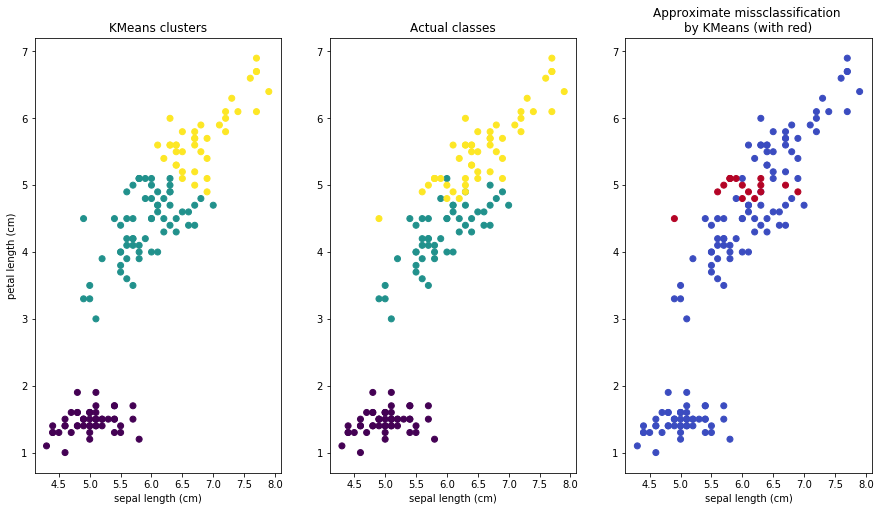

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15,8))
df["Preds"] = transform_preds(preds,Y)

for ax, p in zip([ax0,ax1, ax2], [df["Preds"], df["Class"], (df["Preds"]==df["Class"])]):
    ax.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=p,
               cmap="coolwarm_r" if ax is ax2 else "viridis")

    ax.set_xlabel('sepal length (cm)')
    
ax0.set_title("KMeans clusters")
ax1.set_title("Actual classes")
ax2.set_title("Approximate missclassification \nby KMeans (with red)")
ax0.set_ylabel('petal length (cm)');

From this visualization we can see that KMeans has done a very good job in identifying the different flower types. In the third ax we visualized the "missclassifications" (remember, they are not really missclassifications, they are clusters that have some common statistical characteristics) with our faulty method.